


Car Price Prediction Problem




# Import Libraries

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
print (tf.__version__)

2.4.1


# Load DataFrame File

In [45]:
# Load Data
data = pd.read_csv("/content/CarPrice_Assignment.csv")

# Data Analysis

In [46]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [47]:
data.shape

(205, 26)

The data consists of 26 columns and 205 rows of data.

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

# Data Cleaning

# `Check Null Values if any`

In [49]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [50]:
np.where(data.applymap(lambda x : x == '' or x == ' '))

(array([], dtype=int64), array([], dtype=int64))

# Vectorize data

Some columns have non-numbercial data that needs to be converted. 

In [51]:
data['doornumber'] = data['doornumber'].map({'two':2,'four':4})

In [52]:
data["cylindernumber"] = data["cylindernumber"].map({'two':2,'three':3,'four':4,'five':5,'six':6,'eight':8,'twelve':12})

Drop Car ID and Car Name

In [53]:
data=data.drop(["car_ID","CarName"],axis=1).copy() 

In [54]:
labelencoder = LabelEncoder()

data['fueltype'] = labelencoder.fit_transform(data['fueltype'])
data['aspiration'] = labelencoder.fit_transform(data['aspiration'])
data['carbody'] = labelencoder.fit_transform(data['carbody'])
data['drivewheel'] = labelencoder.fit_transform(data['drivewheel'])
data['enginelocation'] = labelencoder.fit_transform(data['enginelocation'])
data['enginetype'] = labelencoder.fit_transform(data['enginetype'])
data['fuelsystem'] = labelencoder.fit_transform(data['fuelsystem'])

In [55]:
data.dtypes

symboling             int64
fueltype              int64
aspiration            int64
doornumber            int64
carbody               int64
drivewheel            int64
enginelocation        int64
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype            int64
cylindernumber        int64
enginesize            int64
fuelsystem            int64
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [56]:
data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,1,0,2,0,2,0,88.6,168.8,64.1,48.8,2548,0,4,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,1,0,2,0,2,0,88.6,168.8,64.1,48.8,2548,0,4,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,0,2,2,2,0,94.5,171.2,65.5,52.4,2823,5,6,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,1,0,4,3,1,0,99.8,176.6,66.2,54.3,2337,3,4,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,1,0,4,3,0,0,99.4,176.6,66.4,54.3,2824,3,5,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [57]:
data.describe()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,0.902439,0.180488,3.121951,2.614634,1.326829,0.014634,98.756585,174.049268,65.907805,53.724878,2555.565854,3.014634,4.380488,126.907317,3.253659,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,0.297446,0.385535,0.994966,0.859081,0.556171,0.120377,6.021776,12.337289,2.145204,2.443522,520.680204,1.054765,1.080854,41.642693,2.013204,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,0.000000,2.000000,61.000000,0.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,1.000000,0.000000,2.000000,2.000000,1.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,3.000000,4.000000,97.000000,1.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,1.000000,0.000000,4.000000,3.000000,1.000000,0.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,3.000000,4.000000,120.000000,5.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,1.000000,0.000000,4.000000,3.000000,2.000000,0.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,3.000000,4.000000,141.000000,5.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,1.000000,1.000000,4.000000,4.000000,2.000000,1.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,6.000000,12.000000,326.000000,7.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Need to perform feature engineering since data is less. Hence we will do a feature correlation analysis

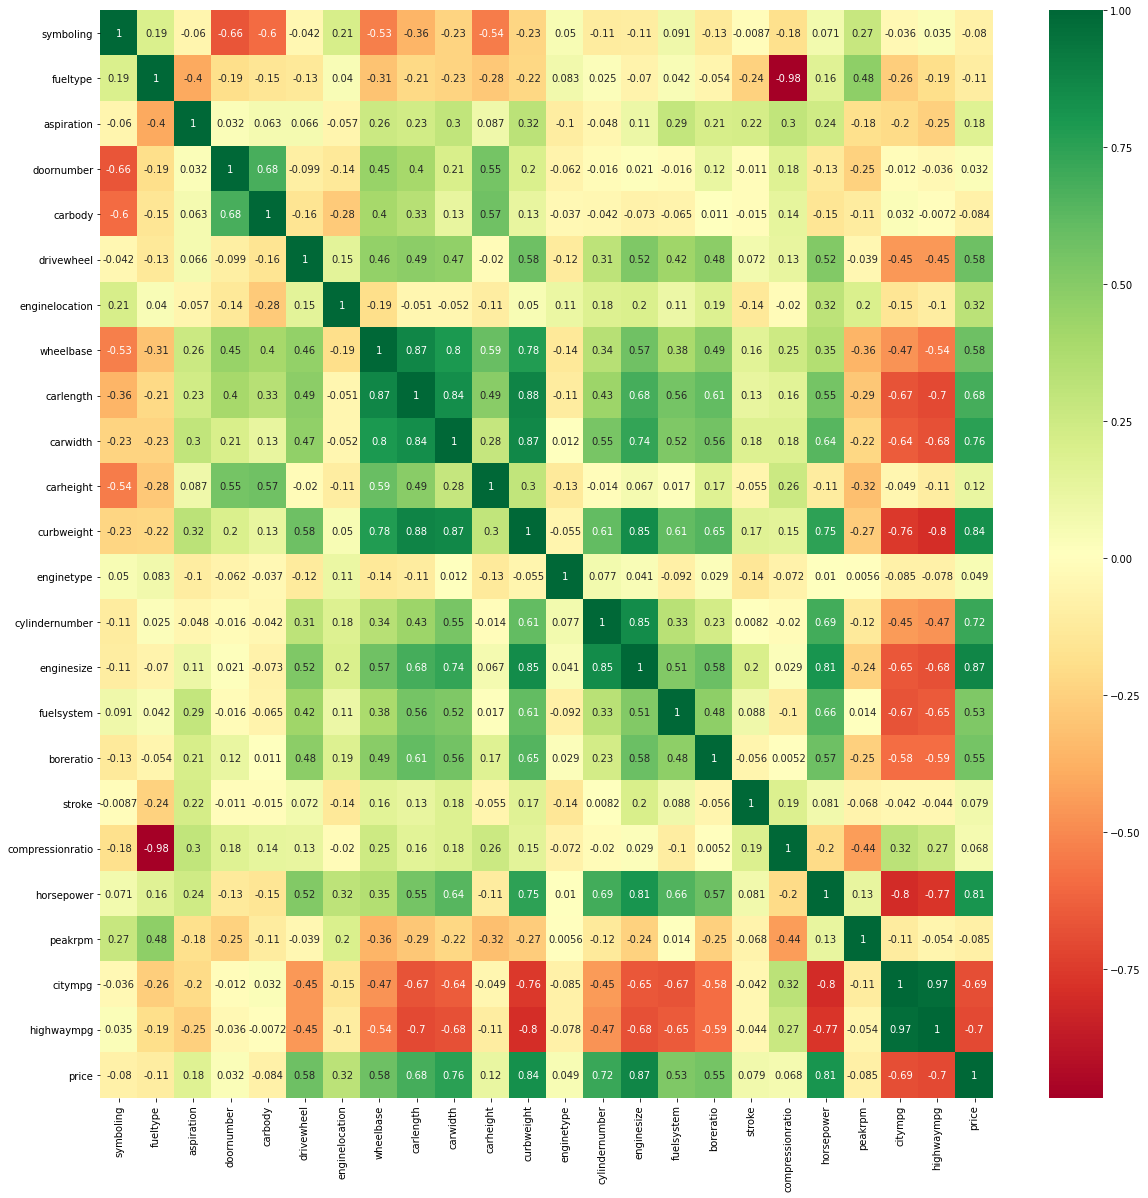

In [59]:
corrmat = data.corr()
corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(data[corr_features].corr(),annot=True,cmap="RdYlGn")

In [60]:
data = data[['horsepower','boreratio','enginesize','curbweight','carwidth','carlength',
              'wheelbase','drivewheel','price','enginelocation']]

In [61]:
x=data.drop(["price"],axis=1).copy() 
y=data["price"].copy()

# Normalizing Data with Mean-Std & Split 50% Training / 20% Validation / 30% Testing

In [62]:
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size=0.3, random_state=1)

Normalize Data

In [63]:
mean = x_train.mean(axis=0)
x_train -= mean
std = x_train.std(axis=0)
x_train /= std
x_test -= mean
x_test /= std

mean_label = y_train.mean(axis=0)
y_train -= mean_label
std_label = y_train.std(axis=0)
y_train /= std_label
y_test -= mean_label
y_test /= std_label

In [64]:
x_train.head()

,horsepower,boreratio,enginesize,curbweight,carwidth,carlength,wheelbase,drivewheel,enginelocation
124,0.911171,0.927318,0.666294,0.471702,0.124259,-0.129365,-0.478064,1.168642,-0.145872
181,1.174254,-0.248467,0.787423,1.125960,0.216806,1.114710,0.965755,1.168642,-0.145872
154,-1.073904,-1.056819,-0.884157,-0.565680,-1.125125,-0.427602,-0.511641,-2.349586,-0.145872
53,-0.930405,-1.130305,-0.908383,-1.243515,-0.847484,-0.674713,-0.948145,-0.590472,-0.145872
94,-0.906488,-0.689386,-0.763028,-1.231726,-1.032578,-0.802529,-0.713104,-0.590472,-0.145872


Checking Data before Pre-Processing & Model

In [65]:
x_train.shape

(143, 9)

In [66]:
x_test.shape

(62, 9)

In [67]:
y_train.shape

(143,)

In [68]:
y_test.shape

(62,)

In [70]:
type(x_train)

pandas.core.frame.DataFrame

In [71]:
x_train = x_train.to_numpy()
y_train = y_train.to_numpy().astype('float32')
x_test = x_test.to_numpy()
y_test = y_test.to_numpy().astype('float32')

Training & Validation data consists of only 143 records. Hence best to use K Fold validation method for the model.

Model Requirements: 3 Hidden Layers with 10,6,8 outputs. 2 Models with relu & tanh.

As it is a regression problem the loss will be mean squared error (mse) and metrics mean absolute error (mae)

# Relu Model

In [72]:
def build_model_relu():
    model = models.Sequential()
    model.add(layers.Dense(10, activation= 'relu',input_shape=(x_train.shape[1],)))
    model.add(layers.Dense(8, activation= 'relu'))
    model.add(layers.Dense(6, activation= 'relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

# Tanh Model

In [73]:
def build_model_tanh():
    model = models.Sequential()
    model.add(layers.Dense(10, activation= 'tanh',input_shape=(x_train.shape[1],)))
    model.add(layers.Dense(8, activation= 'tanh'))
    model.add(layers.Dense(6, activation= 'tanh'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

K-fold Validation

In [74]:
k=4
num_val_samples = len(x_train) // k 
num_epochs = 100
all_scores = []

all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = x_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate(
        [x_train[:i * num_val_samples],
         x_train[(i + 1) * num_val_samples:]],
        axis=0)
    
    partial_train_targets = np.concatenate(
        [y_train[:i * num_val_samples],
         y_train[(i + 1) * num_val_samples:]],
        axis=0)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


# Training Model

Relu Model Training

In [75]:
model = build_model_relu()
history = model.fit(partial_train_data, partial_train_targets,
                    validation_data=(val_data, val_targets),
                    epochs=num_epochs, batch_size=1, verbose=0)
mae_history = history.history['val_mae']
all_mae_histories.append(mae_history)

In [76]:
print (history.history.keys())

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


In [77]:
val_mae = history.history['val_mae']
val_loss = history.history['val_loss']

In [78]:
average_mae_history = [
np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
print ('avg mae history: ', average_mae_history) # Absolute error on every epoch. 

avg mae history:  [0.5489931106567383, 0.4050706923007965, 0.32292675971984863, 0.2914106845855713, 0.2869684100151062, 0.2735520303249359, 0.2669556140899658, 0.26689183712005615, 0.26123443245887756, 0.25895416736602783, 0.24992521107196808, 0.2532046139240265, 0.24548037350177765, 0.24736838042736053, 0.24185745418071747, 0.25025326013565063, 0.236172154545784, 0.2336903214454651, 0.23207572102546692, 0.2259838879108429, 0.22808824479579926, 0.230411559343338, 0.22637693583965302, 0.22356252372264862, 0.21884779632091522, 0.22887597978115082, 0.21785084903240204, 0.21692585945129395, 0.21903017163276672, 0.21512030065059662, 0.21359838545322418, 0.21219103038311005, 0.21032460033893585, 0.2126215249300003, 0.2134566754102707, 0.217926487326622, 0.20995259284973145, 0.2108459323644638, 0.21177540719509125, 0.21110782027244568, 0.21848490834236145, 0.2134040743112564, 0.20987817645072937, 0.21958942711353302, 0.20720823109149933, 0.20930291712284088, 0.22270207107067108, 0.20731863379

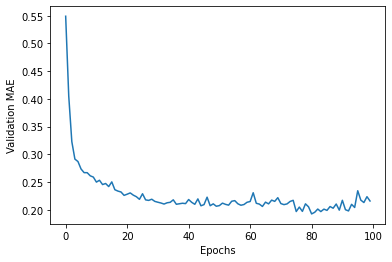

In [79]:
plt.plot(average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

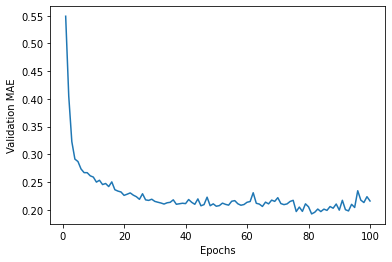

In [80]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [81]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

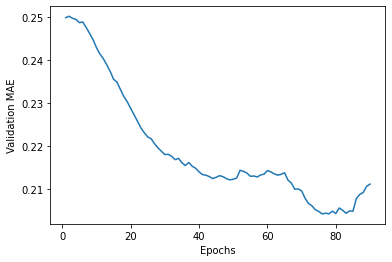

In [82]:
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

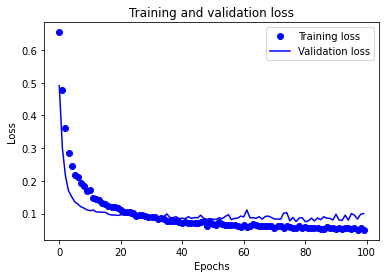

In [83]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(100)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

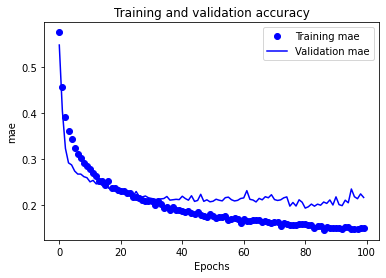

In [84]:
acc_values = history_dict['mae']
val_acc_values = history_dict['val_mae']
plt.plot(epochs, acc_values, 'bo', label='Training mae')
plt.plot(epochs, val_acc_values, 'b', label='Validation mae')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend()
plt.show()

Tanh Model training

In [85]:
model = build_model_tanh()
history = model.fit(partial_train_data, partial_train_targets,
                    validation_data=(val_data, val_targets),
                    epochs=num_epochs, batch_size=1, verbose=0)
mae_history = history.history['val_mae']
all_mae_histories.append(mae_history)

In [86]:
val_mae = history.history['val_mae']
val_loss = history.history['val_loss']

In [87]:
average_mae_history = [
np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
print ('avg mae history: ', average_mae_history) # Absolute error on every epoch. 

avg mae history:  [0.5155514478683472, 0.4260309636592865, 0.3768471032381058, 0.3487085849046707, 0.3409326523542404, 0.3324565589427948, 0.3246820271015167, 0.32055163383483887, 0.315045028924942, 0.3102700710296631, 0.3022019639611244, 0.30540502071380615, 0.3005160316824913, 0.2979496940970421, 0.2931409403681755, 0.29641787707805634, 0.2825811728835106, 0.2790040671825409, 0.27649591863155365, 0.27370691299438477, 0.27519872039556503, 0.27622470259666443, 0.2676386460661888, 0.2652641013264656, 0.2590247765183449, 0.27726729959249496, 0.25755637139081955, 0.2615852952003479, 0.2555719017982483, 0.25850648432970047, 0.2520425096154213, 0.2571841701865196, 0.2568279132246971, 0.24839437752962112, 0.25171438604593277, 0.25182918459177017, 0.25286558270454407, 0.25785737484693527, 0.25473853200674057, 0.2519598454236984, 0.25319139659404755, 0.2663414254784584, 0.25546136498451233, 0.24972502142190933, 0.24367845803499222, 0.2581665888428688, 0.2538875415921211, 0.24721041321754456, 0

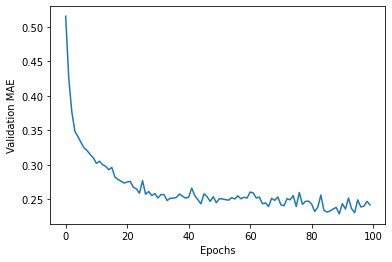

In [88]:
plt.plot(average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

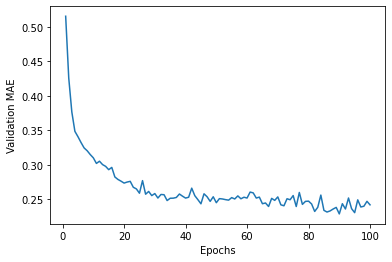

In [89]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

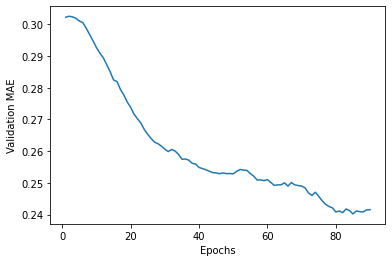

In [90]:
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

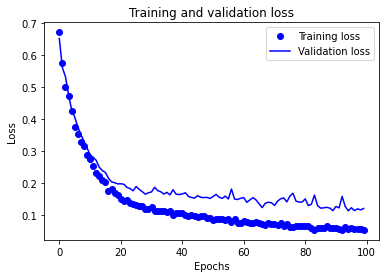

In [91]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(100)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

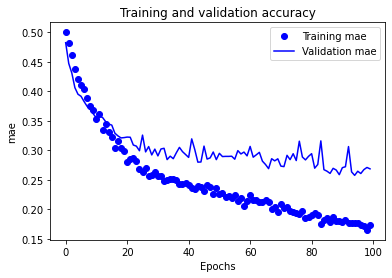

In [92]:
acc_values = history_dict['mae']
val_acc_values = history_dict['val_mae']
plt.plot(epochs, acc_values, 'bo', label='Training mae')
plt.plot(epochs, val_acc_values, 'b', label='Validation mae')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend()
plt.show()

# Train Final Model

From the above training data we can see that average mean error is less in Relu + Epochs should be near 30 to avoid overfitting. 

In [98]:
model = build_model_relu()
history = model.fit(partial_train_data, partial_train_targets,
                    validation_data=(val_data, val_targets),
                    epochs=30, batch_size=1, verbose=0)

# Evaluation & Prediction

In [99]:
test_mse_score, test_mae_score = model.evaluate(x_test, y_test)
print("mae score ",test_mae_score)
print("mse score ",test_mse_score)

2/2 [==============================] - 0s 5ms/step - loss: 0.1473 - mae: 0.2561
mae score  0.256099671125412
mse score  0.14729826152324677


In [130]:
y_pred = model.predict(x_test)

# denormalization data to check predictions

In [131]:
def denormalize(x):
    return (x * std_label) + mean_label

In [132]:
y_pred = denormalize(y_pred)
y_pred = y_pred.flatten()
y_pred.shape

(62,)

In [133]:
y_true = denormalize(y_test)
y_true = y_true.flatten()
y_true.shape

(62,)

In [134]:
print (y_pred[5])

25049.594


In [135]:
print (y_true[5])

25552.0


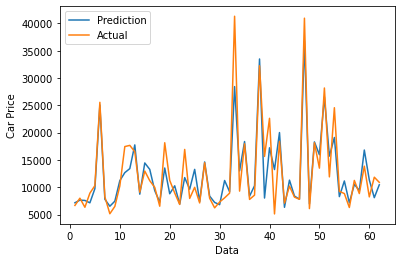

In [139]:
plt.plot(range(1, len(y_pred[:])+1), y_pred[:], label="Prediction")
plt.plot(range(1, len(y_pred[:])+1), y_true[:], label="Actual")
plt.xlabel("Data")
plt.ylabel("Car Price")
plt.legend()
plt.show()